# Project

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


df=pd.read_csv("marketing_data.csv")

df.columns = [col.strip() for col in df.columns]

print("\nSummary Stats:")
display(df.describe(include='all'))

print("\nMissing Values:")
print(df.isna().sum())

print("\nValid Entries:")
print(df.notna().sum())

print(df['Education'].unique())
print(df['Marital_Status'].unique())

df['Education'] = df['Education'].replace({
    'Graduation': 'Graduate',
    '2n Cycle': 'Graduate',
})
df['Marital_Status'] = df['Marital_Status'].replace({
    'Alone': 'Single',
    'Together': 'Married',
})

df.columns = df.columns.str.strip()

df['Income'] = (
    df['Income']
    .astype(str)
    .str.replace(r'[^0-9.\-]', '', regex=True)
    .str.strip()
)
df['Income'] = pd.to_numeric(df['Income'], errors='coerce')

for col in ['Education', 'Marital_Status']:
    df[col] = df[col].astype(str).str.strip()

df['Education'] = df['Education'].replace({
    'Graduation': 'Graduate',
    '2n Cycle': 'Graduate',
})

df['Marital_Status'] = df['Marital_Status'].replace({
    'Together': 'Married',
    'Alone': 'Single',
    'YOLO': 'Single',
    'Absurd': 'Single'
})


group_mean = df.groupby(['Education', 'Marital_Status'])['Income'].transform('mean')
df['Income'] = df['Income'].fillna(group_mean)

edu_mean = df.groupby('Education')['Income'].transform('mean')
df['Income'] = df['Income'].fillna(edu_mean)

df['Income'] = df['Income'].fillna(df['Income'].median())

print("\nMissing Income after imputation:", df['Income'].isna().sum())
print("Income dtype:", df['Income'].dtype)
try:
    from IPython.display import display
    display(df[['Education','Marital_Status','Income']].head())
except Exception:
    print(df[['Education','Marital_Status','Income']].head().to_string())




Summary Stats:


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
count,2240.000000,2240.000000,2240,2240,2216,2240.000000,2240.000000,2240,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240
unique,NaN,NaN,5,8,1974,NaN,NaN,663,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
top,NaN,NaN,Graduation,Married,"$7,500.00",NaN,NaN,8/31/12,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SP
freq,NaN,NaN,1127,864,12,NaN,NaN,12,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1095
mean,5592.159821,1968.805804,NaN,NaN,NaN,0.444196,0.506250,NaN,49.109375,303.935714,...,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375,NaN
std,3246.662198,11.984069,NaN,NaN,NaN,0.538398,0.544538,NaN,28.962453,336.597393,...,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391,NaN
min,0.000000,1893.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,2828.250000,1959.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,24.000000,23.750000,...,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,5458.500000,1970.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,49.000000,173.500000,...,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,8427.750000,1977.000000,NaN,NaN,NaN,1.000000,1.000000,NaN,74.000000,504.250000,...,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN



Missing Values:
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

Valid Entries:
ID                     2240
Year_Birth             2240
Education              2240
Marital_Status         2240
Income                 2216
Kidhome                2240
Teenhome               2240
Dt_Customer            2240
Re

,Education,Marital_Status,Income
0,Graduate,Divorced,84835.0
1,Graduate,Single,57091.0
2,Graduate,Married,67267.0
3,Graduate,Married,32474.0
4,Graduate,Single,21474.0


In [25]:
df['Children'] = df['Kidhome'] + df['Teenhome']
df['Age'] = 2014 - df['Year_Birth']
spend_cols = [col for col in df.columns if 'Mnt' in col]
df['Total_Spending'] = df[spend_cols].sum(axis=1)
print(df[['Kidhome','Teenhome','Children','Year_Birth','Age','Total_Spending']].head().to_string())

df.columns = df.columns.str.strip()

purchase_cols = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']

for c in purchase_cols:
    if c not in df.columns:
        match = [col for col in df.columns if col.strip().lower() == c.lower()]
        if match:
            df.rename(columns={match[0]: c}, inplace=True)

for c in purchase_cols:
    df[c] = pd.to_numeric(df[c], errors='coerce').fillna(0).astype(int)

df['Total_Purchases'] = df[purchase_cols].sum(axis=1)


if 'Total_Spending' in df.columns:
    df['Avg_Order_Value'] = (df['Total_Spending'] / df['Total_Purchases']).replace([np.inf, -np.inf], np.nan).fillna(0)

print("\nPurchase columns:", purchase_cols)
print(df[['NumWebPurchases','NumCatalogPurchases','NumStorePurchases','Total_Purchases']].head().to_string())
if 'Avg_Order_Value' in df.columns:
    print("\nSample Avg_Order_Value:", df['Avg_Order_Value'].head().to_list())

   Kidhome  Teenhome  Children  Year_Birth  Age  Total_Spending
0        0         0         0        1970   44            1190
1        0         0         0        1961   53             577
2        0         1         1        1958   56             251
3        1         1         2        1967   47              11
4        1         0         1        1989   25              91

Purchase columns: ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
   NumWebPurchases  NumCatalogPurchases  NumStorePurchases  Total_Purchases
0                4                    4                  6               14
1                7                    3                  7               17
2                3                    2                  5               10
3                1                    0                  2                3
4                3                    1                  2                6

Sample Avg_Order_Value: [85.0, 33.94117647058823, 25.1, 3.6666666666666665, 

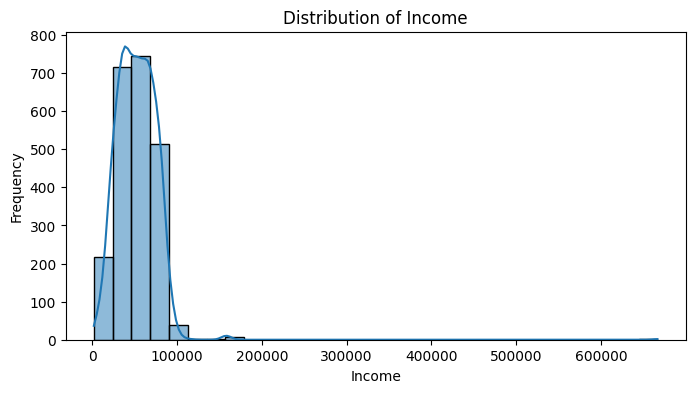

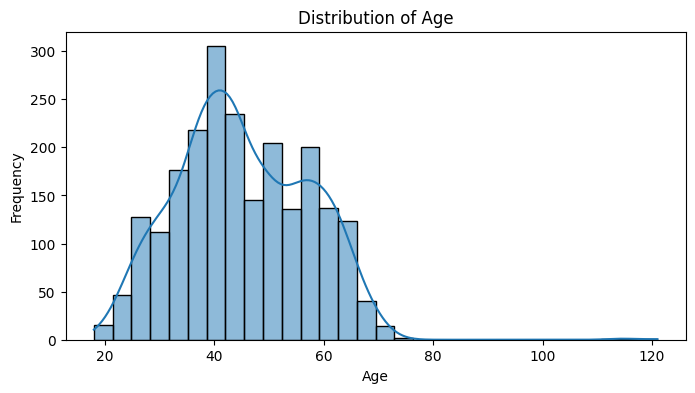

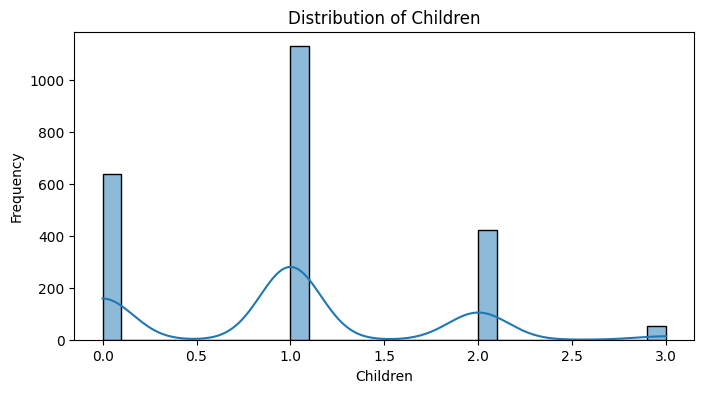

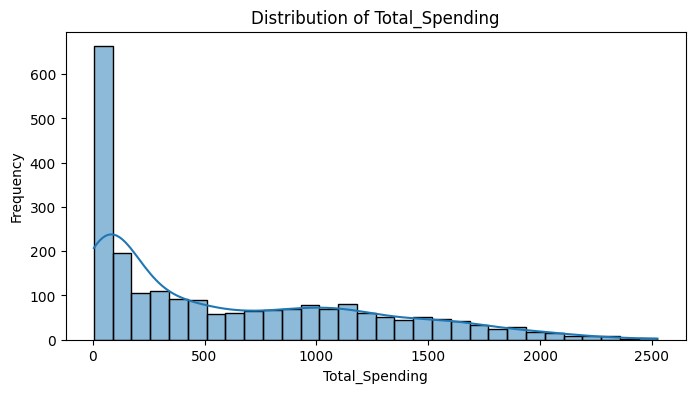

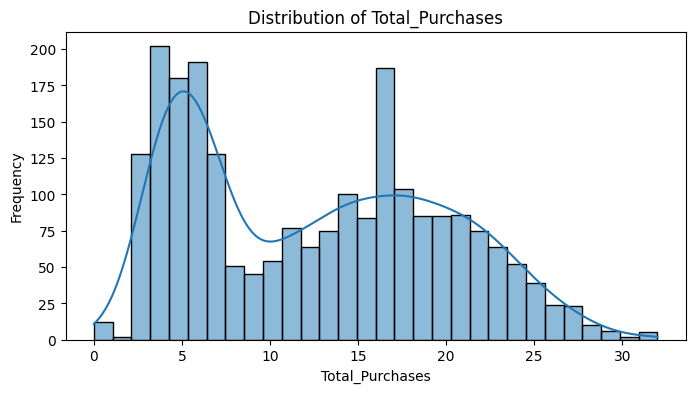

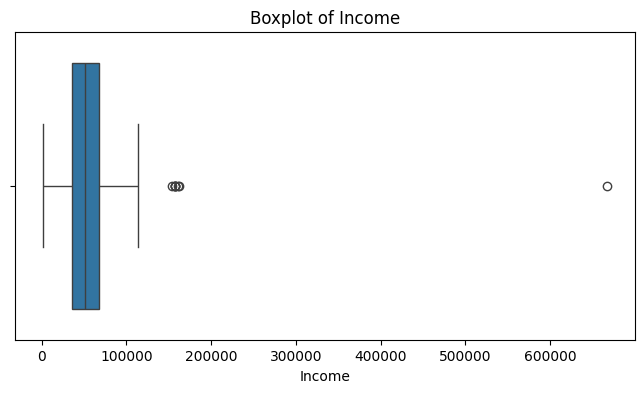

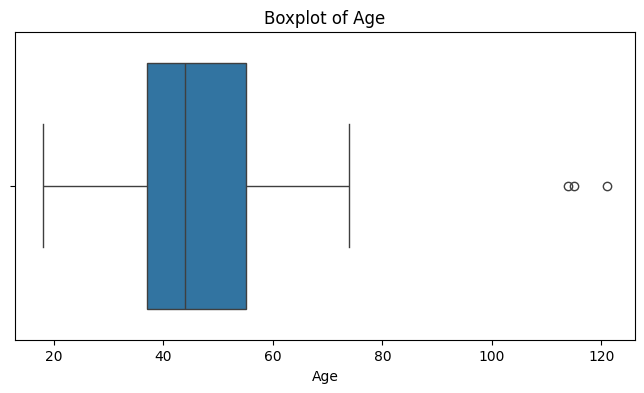

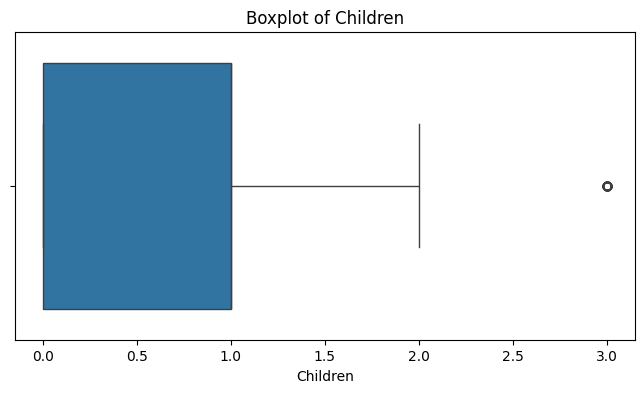

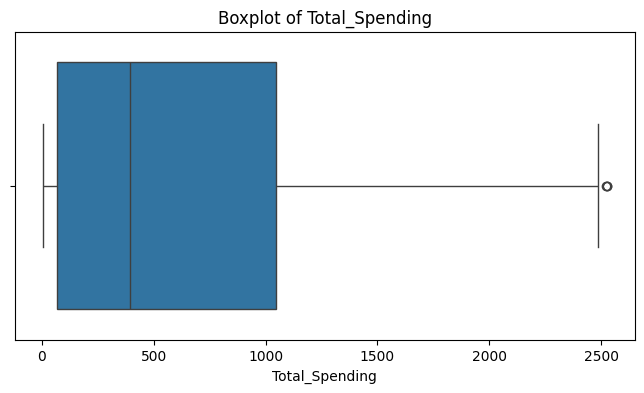

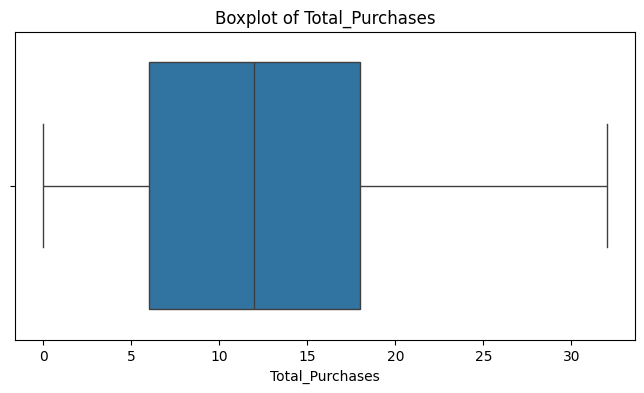

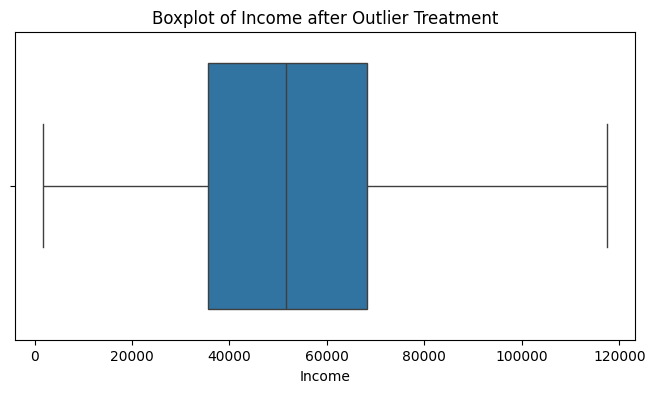

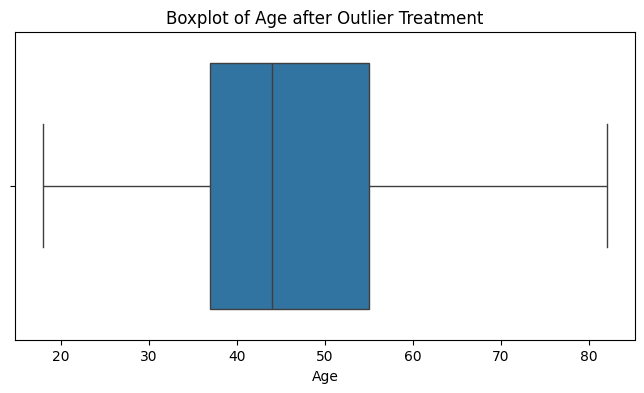

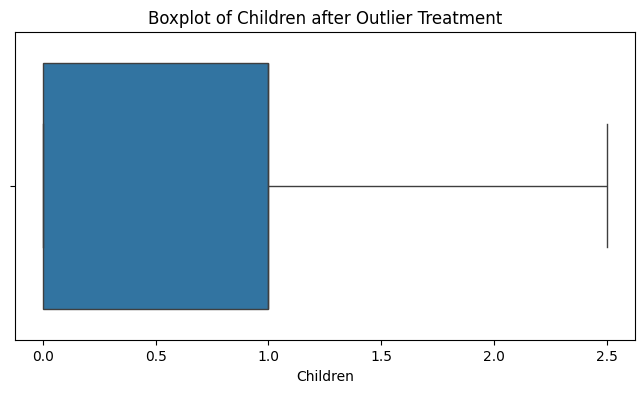

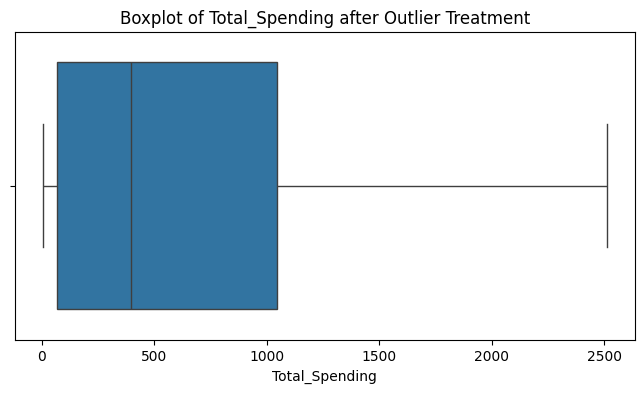

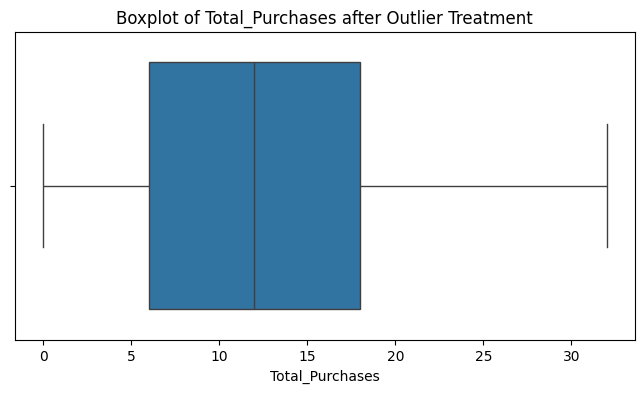

In [28]:
num_cols = ['Income', 'Age', 'Children', 'Total_Spending', 'Total_Purchases']

for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(x=df[col].dropna(), kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[col].dropna())
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

def treat_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[col] = np.where(data[col] < lower_bound, lower_bound,
        np.where(data[col] > upper_bound, upper_bound, data[col]))
    return data

for col in num_cols:
    df = treat_outliers_iqr(df, col)

for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[col].dropna())
    plt.title(f'Boxplot of {col} after Outlier Treatment')
    plt.xlabel(col)
    plt.show()